In [2]:
#Loading the iris dataset

import pandas as pd
iris_data = pd.read_csv('iris.csv')

iris_data.head(3)

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [3]:
#Exploring the data

iris_data.info()

iris_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#Preparing the data

from sklearn.model_selection import train_test_split

x = iris_data.iloc[:, : -1].values
y = iris_data.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
#Creating the KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
#Making Predictions

y_pred = knn.predict(x_test)

In [8]:
#Evaluating the Model

from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, y_pred)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n      Setosa       1.00      1.00      1.00        10\n  Versicolor       1.00      1.00      1.00         9\n   Virginica       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

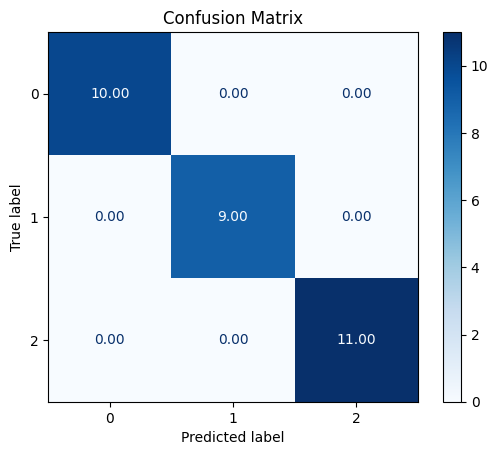

In [15]:
#Visualize the results


import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, knn.predict(x_test))

# Create ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot(values_format=".2f", cmap="Blues")
plt.title('Confusion Matrix')
plt.show()